# Variations in the xy-plane

*This notebook explores the variations in the xy-plane.*

Recall that each build contains eight 'anchors', i.e. specimen **not** included in the main study. These anchors are specimen rotated -90 degrees about the x-axis. All builds contain 45 defined positions in a 3x3x5 grid as displayed in the figure below. The anchors are found at **(2,3,z)** for all layers, and at **(3,1,z)** for layers 1, 3 and 5.


<img src="figs/layout_positions.png" width="600"/>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import my_functions as func

In [4]:
"""
Retrieve all the data and sort it into a dictionary where each entry is a separate characteristic.

Key:   Name of the characteristic.
Value: DataFrame containing the measured values and the layout data.

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_char_dict()

## Cylindricity

In [ ]:
"""
* Add description *

"""

## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Concatinate dataframes
df = pd.concat(dfs)

# Isolate the necessary columns
df = df[['error', 'x_pos', 'y_pos', 'z_pos']]


## Create figure
# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Set colormap-palette
cmap = "RdYlGn"

# Construct each plot
for i in range(3):
    for j in range(2):
        if i or j:
            data = df[df['z_pos'] == ((i*2)+j)]
            
            
        
        
        
        
        
        
        
        
        
## Display figure
plt.show()

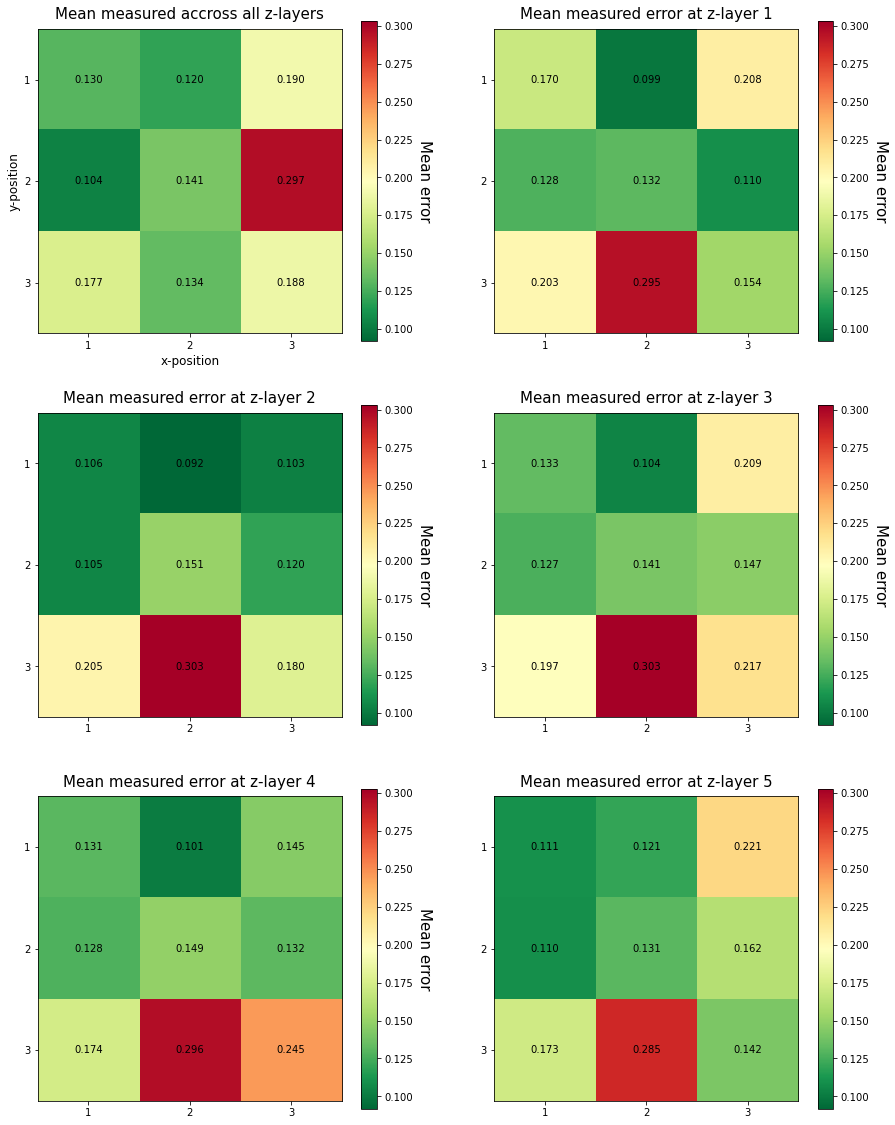

In [5]:
## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Concatinate dataframes
df = pd.concat(dfs)

# Isolate the necessary columns
df = df[['error', 'x_pos', 'y_pos', 'z_pos']]


## Create figure
# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Set colormap-palette
cmap = "RdYlGn_r"

vmin = 0.092
vmax = 0.303

# Initialzie an empty matrix to represent the error values of a layer
matrix = np.zeros((3, 3))


## Plot the z-layers separately
for z in range(1,6):
    
    # Calculate coordinates for plot
    i = int(z/2)
    j = z%2
    
    # Fill out layer matrix
    for y in range(1,4):
        for x in range(1,4):
            temp = df[(df['z_pos'] == z) & (df['y_pos'] == y) & (df['x_pos'] == x)]
            matrix[y-1, x-1] = temp['error'].mean()

    # Create heatmap from matrix
    im = axs[i, j].imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)
    
    # Add annotation to the heatmap
    for y in range(1,4):
        for x in range(1,4):
            axs[i, j].text(x-1, y-1, "{:.3f}".format(matrix[y-1, x-1]),
                    ha="center", va="center", color="black")
            
    axs[i, j].set_xticks([0, 1, 2])
    axs[i, j].set_yticks([0, 1, 2])
    
    axs[i, j].set_xticklabels([1, 2, 3])
    axs[i, j].set_yticklabels([1, 2, 3])
    
    axs[i, j].set_title("Mean measured error at z-layer {}".format(z), fontsize=15, pad=10)
    
    cbar = axs[i, j].figure.colorbar(im, ax=axs[i, j])
    cbar.ax.set_ylabel("Mean error", rotation=-90, va="bottom", fontsize=15)

# Prepare data for a 'total'-plot
for y in range(1,4):
    for x in range(1,4):
            temp = df[(df['y_pos'] == y) & (df['x_pos'] == x)]
            matrix[x-1, y-1] = temp['error'].mean()

# Plot the 'total' in the first square
axs[0, 0].imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)

for y in range(1,4):
    for x in range(1,4):
        axs[0, 0].text(y-1, x-1, "{:.3f}".format(matrix[x-1, y-1]),
                ha="center", va="center", color="black")

        
axs[0, 0].set_xticks([0, 1, 2])
axs[0, 0].set_yticks([0, 1, 2])

axs[0, 0].set_xticklabels([1, 2, 3])
axs[0, 0].set_yticklabels([1, 2, 3])

axs[0, 0].set_title("Mean measured accross all z-layers", fontsize=15, pad=10)

axs[0, 0].set_xlabel("x-position", fontsize=12)
axs[0, 0].set_ylabel("y-position", fontsize=12)

    
cbar = axs[0, 0].figure.colorbar(im, ax=axs[0, 0])
cbar.ax.set_ylabel("Mean error", rotation=-90, va="bottom", fontsize=15)
        
plt.show()